# Extent of loss of potential sales in 2015

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,Unnamed: 0,accID,accType,accSize,accTargets,district,month,sales,qty,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,compBrand
0,1,XYZ-987002,Pharmacy,700,25,3,2013-10-01,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,2,XYZ-987002,Pharmacy,700,25,3,2013-11-01,852365,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0,4
2,3,XYZ-987002,Pharmacy,700,25,3,2013-12-01,2557096,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,4,XYZ-987002,Pharmacy,700,25,3,2014-01-01,4261826,41,0.0,0.0,0.0,0.0,825000.0,300000.0,0.0,0.0,4
4,5,XYZ-987002,Pharmacy,700,25,3,2014-02-01,5966556,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


Dropping unwanted features which had no impact on dependent variable sales

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,accID,accType,accSize,accTargets,district,month,sales,qty,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,compBrand
0,XYZ-987002,Pharmacy,700,25,3,2013-10-01,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,XYZ-987002,Pharmacy,700,25,3,2013-11-01,852365,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0,4
2,XYZ-987002,Pharmacy,700,25,3,2013-12-01,2557096,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,XYZ-987002,Pharmacy,700,25,3,2014-01-01,4261826,41,0.0,0.0,0.0,0.0,825000.0,300000.0,0.0,0.0,4
4,XYZ-987002,Pharmacy,700,25,3,2014-02-01,5966556,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [5]:
df1=df.copy()

Furthur extension of month column inorder to get much more insights of sales for each of individual year/month/day features

In [6]:
df1['year'] = pd.DatetimeIndex(df['month']).year
df1['month'] = pd.DatetimeIndex(df['month']).month
df1['day'] = pd.DatetimeIndex(df['month']).day
df1.head()

,accID,accType,accSize,accTargets,district,month,sales,qty,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,compBrand,year,day
0,XYZ-987002,Pharmacy,700,25,3,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2013,1
1,XYZ-987002,Pharmacy,700,25,3,11,852365,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0,4,2013,1
2,XYZ-987002,Pharmacy,700,25,3,12,2557096,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2013,1
3,XYZ-987002,Pharmacy,700,25,3,1,4261826,41,0.0,0.0,0.0,0.0,825000.0,300000.0,0.0,0.0,4,2014,1
4,XYZ-987002,Pharmacy,700,25,3,2,5966556,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2014,1


Obtaining all the features data within the year 2015 for starting 6 months so can access the data before the new compBrand is introduced

In [7]:
before_mid_2015 = df1[df1.year == 2015 ][df1.month<6][['year','qty','accType','strategy1','strategy2','strategy3','salesVisit1','salesVisit2','salesVisit3','salesVisit4','salesVisit5','compBrand','sales']]
before_mid_2015.head()

C:\Users\899164\AppData\Local\Temp\6\ipykernel_16784\1120997066.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  before_mid_2015 = df1[df1.year == 2015 ][df1.month<6][['year','qty','accType','strategy1','strategy2','strategy3','salesVisit1','salesVisit2','salesVisit3','salesVisit4','salesVisit5','compBrand','sales']]


,year,qty,accType,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,compBrand,sales
15,2015,57,Pharmacy,0.0,152712.0,0.0,0.0,450000.0,1275000.0,0.0,0.0,4,5966556
16,2015,33,Pharmacy,0.0,160000.0,0.0,0.0,375000.0,1125000.0,0.0,0.0,4,3409461
17,2015,82,Pharmacy,0.0,159600.0,0.0,0.0,600000.0,1950000.0,0.0,0.0,4,8523652
18,2015,82,Pharmacy,0.0,224500.0,0.0,0.0,450000.0,1800000.0,0.0,0.0,4,8523652
19,2015,156,Pharmacy,0.0,1553326.0,0.0,0.0,300000.0,1575000.0,0.0,0.0,4,16194938


In [8]:
before_mid_2015.shape

(620, 13)

Obtaining all the features data within the year 2015 for after 6 months so can access the data after the new compBrand is introduced

In [9]:
after_mid_2015 = df1[df1.year == 2015 ][df1.month>6][['year','qty','accType','strategy1','strategy2','strategy3','salesVisit1','salesVisit2','salesVisit3','salesVisit4','salesVisit5','compBrand','sales']]
after_mid_2015.head()

C:\Users\899164\AppData\Local\Temp\6\ipykernel_16784\1216526530.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after_mid_2015 = df1[df1.year == 2015 ][df1.month>6][['year','qty','accType','strategy1','strategy2','strategy3','salesVisit1','salesVisit2','salesVisit3','salesVisit4','salesVisit5','compBrand','sales']]


,year,qty,accType,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,compBrand,sales
21,2015,123,Pharmacy,0.0,416114.0,0.0,0.0,450000.0,2475000.0,0.0,0.0,5,12785478
22,2015,115,Pharmacy,0.0,460359.0,0.0,0.0,225000.0,1575000.0,0.0,0.0,5,11933113
23,2015,164,Pharmacy,0.0,287126.0,0.0,0.0,300000.0,1425000.0,0.0,0.0,5,17047304
45,2015,287,Hospital,252104.0,798300.0,0.0,75000.0,1050000.0,375000.0,150000.0,0.0,5,29832781
46,2015,361,Hospital,0.0,1081875.0,0.0,0.0,1725000.0,450000.0,0.0,0.0,5,37504068


In [10]:
after_mid_2015.shape

(372, 13)

In [11]:
import seaborn as sns

Plotting all the Strategies with respect to Sales

Text(0.5, 1.0, 'Sales Prediction by Quantity')

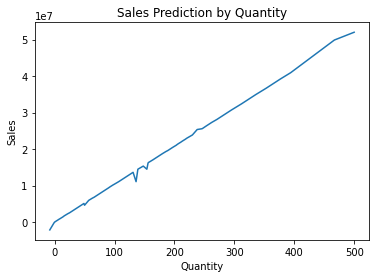

In [12]:
before_mid_2015.groupby('qty')['sales'].median().plot()
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.title("Sales Prediction by Quantity")

Text(0.5, 1.0, 'Sales Prediction by Strategy1')

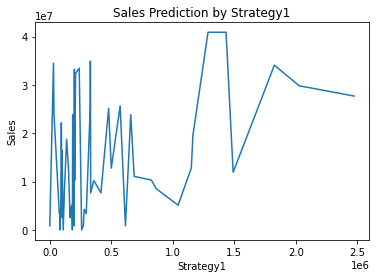

In [13]:
before_mid_2015.groupby('strategy1')['sales'].median().plot()
plt.xlabel('Strategy1')
plt.ylabel('Sales')
plt.title("Sales Prediction by Strategy1")

Text(0.5, 1.0, 'Sales Prediction by strategy2')

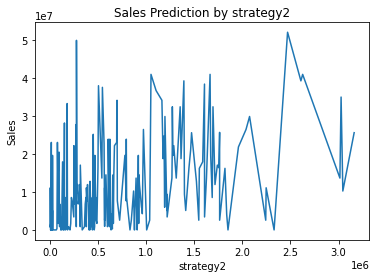

In [14]:
before_mid_2015.groupby('strategy2')['sales'].median().plot()
plt.xlabel('strategy2')
plt.ylabel('Sales')
plt.title("Sales Prediction by strategy2")

Strategy3 had no impact on Sales

Text(0.5, 1.0, 'Sales Prediction by strategy3')

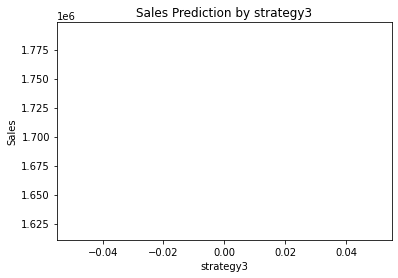

In [15]:
before_mid_2015.groupby('strategy3')['sales'].median().plot()
plt.xlabel('strategy3')
plt.ylabel('Sales')
plt.title("Sales Prediction by strategy3")

In [16]:
before_mid_2015['strategy3'].unique()

array([0.])

Text(0.5, 1.0, 'Sales Prediction by Quantity')

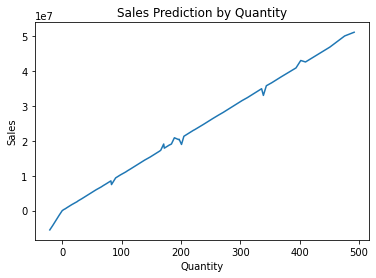

In [17]:
after_mid_2015.groupby('qty')['sales'].median().plot()
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.title("Sales Prediction by Quantity")

Text(0.5, 1.0, 'Sales Prediction by strategy1')

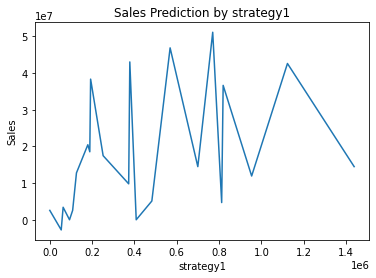

In [18]:
after_mid_2015.groupby('strategy1')['sales'].median().plot()
plt.xlabel('strategy1')
plt.ylabel('Sales')
plt.title("Sales Prediction by strategy1")

Text(0.5, 1.0, 'Sales Prediction by strategy2')

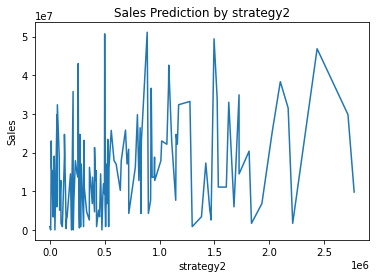

In [19]:
after_mid_2015.groupby('strategy2')['sales'].median().plot()
plt.xlabel('strategy2')
plt.ylabel('Sales')
plt.title("Sales Prediction by strategy2")

Text(0.5, 1.0, 'Sales Prediction by strategy3')

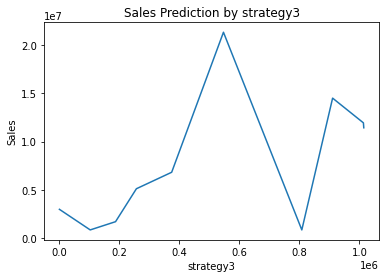

In [20]:
after_mid_2015.groupby('strategy3')['sales'].median().plot()
plt.xlabel('strategy3')
plt.ylabel('Sales')
plt.title("Sales Prediction by strategy3")

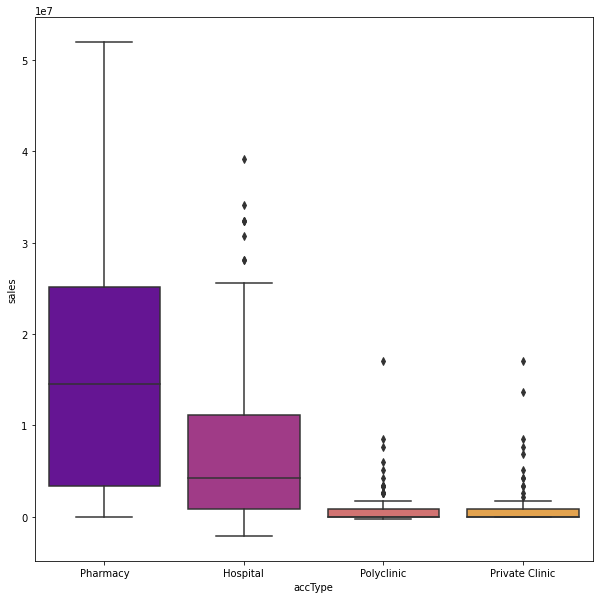

In [21]:
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=before_mid_2015, x='accType',y='sales',palette='plasma')

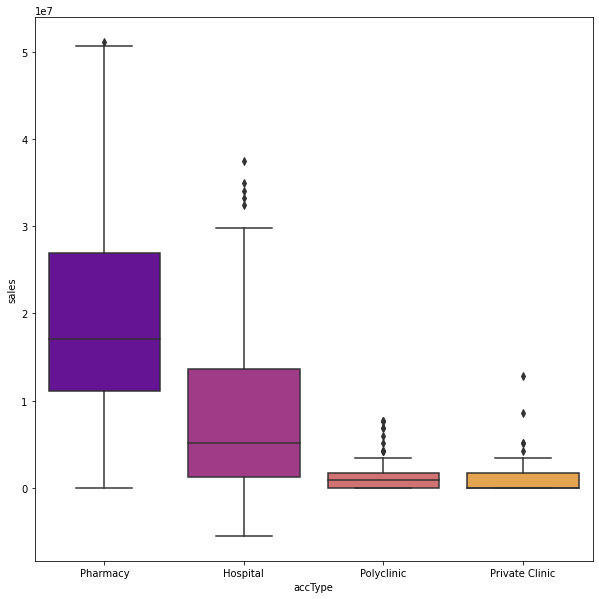

In [22]:
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=after_mid_2015, x='accType',y='sales',palette='plasma')

In [23]:
before_mid_2015.head()

,year,qty,accType,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,compBrand,sales
15,2015,57,Pharmacy,0.0,152712.0,0.0,0.0,450000.0,1275000.0,0.0,0.0,4,5966556
16,2015,33,Pharmacy,0.0,160000.0,0.0,0.0,375000.0,1125000.0,0.0,0.0,4,3409461
17,2015,82,Pharmacy,0.0,159600.0,0.0,0.0,600000.0,1950000.0,0.0,0.0,4,8523652
18,2015,82,Pharmacy,0.0,224500.0,0.0,0.0,450000.0,1800000.0,0.0,0.0,4,8523652
19,2015,156,Pharmacy,0.0,1553326.0,0.0,0.0,300000.0,1575000.0,0.0,0.0,4,16194938


Dropping few features in order to avoid multi collinearlity for better model accuracy

In [24]:
before_mid_2015.drop(['year','accType','compBrand'],axis=1,inplace=True)
after_mid_2015.drop(['year','accType','compBrand'],axis=1,inplace=True)

In [25]:
before_mid_2015.head()

,qty,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,sales
15,57,0.0,152712.0,0.0,0.0,450000.0,1275000.0,0.0,0.0,5966556
16,33,0.0,160000.0,0.0,0.0,375000.0,1125000.0,0.0,0.0,3409461
17,82,0.0,159600.0,0.0,0.0,600000.0,1950000.0,0.0,0.0,8523652
18,82,0.0,224500.0,0.0,0.0,450000.0,1800000.0,0.0,0.0,8523652
19,156,0.0,1553326.0,0.0,0.0,300000.0,1575000.0,0.0,0.0,16194938


In [26]:
after_mid_2015.head()

,qty,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,sales
21,123,0.0,416114.0,0.0,0.0,450000.0,2475000.0,0.0,0.0,12785478
22,115,0.0,460359.0,0.0,0.0,225000.0,1575000.0,0.0,0.0,11933113
23,164,0.0,287126.0,0.0,0.0,300000.0,1425000.0,0.0,0.0,17047304
45,287,252104.0,798300.0,0.0,75000.0,1050000.0,375000.0,150000.0,0.0,29832781
46,361,0.0,1081875.0,0.0,0.0,1725000.0,450000.0,0.0,0.0,37504068


In [27]:
before_mid_2015['strategy3'].unique()

array([0.])

In [28]:
after_mid_2015['strategy3'].unique()

array([      0.,  910584.,  256615.,  187088., 1013230.,  807938.,
        102646.,  374176., 1014492.,  546772.])

# Prediction of all the Sales in the year 2015 before the competitor drug entrance 

Dependent feature Sales is stored in variable Y

In [29]:
y=before_mid_2015['sales']
y

15       5966556
16       3409461
17       8523652
18       8523652
19      16194938
          ...   
2967           0
2968      852365
2969           0
2970           0
2971           0
Name: sales, Length: 620, dtype: int64

All independent features are stored in variable X

In [30]:
X=before_mid_2015.copy()
X.drop(['sales'],axis=1,inplace=True)
X.head()

,qty,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5
15,57,0.0,152712.0,0.0,0.0,450000.0,1275000.0,0.0,0.0
16,33,0.0,160000.0,0.0,0.0,375000.0,1125000.0,0.0,0.0
17,82,0.0,159600.0,0.0,0.0,600000.0,1950000.0,0.0,0.0
18,82,0.0,224500.0,0.0,0.0,450000.0,1800000.0,0.0,0.0
19,156,0.0,1553326.0,0.0,0.0,300000.0,1575000.0,0.0,0.0


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [33]:
X_train.shape

(496, 9)

In [34]:
y_test.shape

(124,)

In [35]:
X_test.shape

(124, 9)

In [36]:
y_train.shape

(496,)

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [38]:
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lr',LinearRegression())
])

In [39]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [40]:
lr_pred=pipe.predict(X_test)

In [41]:
pd.DataFrame({'original test set':y_test, 'predictions': lr_pred})

,original test set,predictions
1867,0,3.474864e+03
2202,1704730,1.652281e+06
2104,22161495,2.219659e+07
1769,0,7.215412e+03
1815,0,1.215877e+04
...,...,...
375,5114191,5.129743e+06
63,9376017,9.357139e+06
1024,19604399,1.974820e+07
761,1704730,1.687077e+06


In [42]:
from sklearn import metrics
print('r2:', np.sqrt(metrics.r2_score(y_test, lr_pred)))

r2: 0.9994364048317164


In [43]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

RMSE: 374702.7391446941


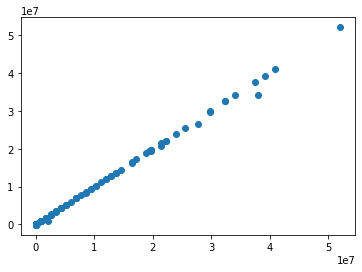

In [44]:
plt.scatter(y_test,lr_pred)

In [45]:
from sklearn.model_selection import cross_val_score,KFold
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.99990129 0.99958304 0.99891695 0.97338671 0.99959707 0.99974635
 0.99963592 0.99993104 0.99995103 0.99672349]
Mean of all scores:  0.9967372903367198


<AxesSubplot:title={'center':'LinearRegression'}, xlabel='Training examples', ylabel='Score'>

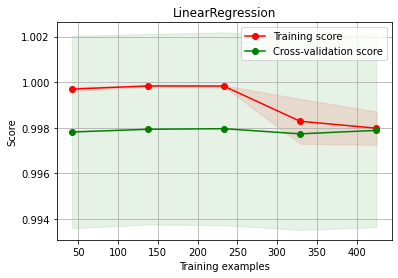

In [46]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='LinearRegression')

In [47]:
from sklearn.linear_model import Lasso
lass=Lasso(alpha=1.0)
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lass',Lasso(alpha=1.0))
])

In [48]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lass', Lasso())])

In [49]:
lasso_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': lasso_pred})

,original test set,predictions
1867,0,3.475377e+03
2202,1704730,1.652283e+06
2104,22161495,2.219659e+07
1769,0,7.215290e+03
1815,0,1.215900e+04
...,...,...
375,5114191,5.129740e+06
63,9376017,9.357138e+06
1024,19604399,1.974820e+07
761,1704730,1.687078e+06


In [50]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lasso_pred)))

r2: 0.9994364060278059


In [51]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

RMSE: 374702.34165022994


In [52]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.99990129 0.99958305 0.99891694 0.9733867  0.99959708 0.99974635
 0.99963593 0.99993105 0.99995104 0.99672351]
Mean of all scores:  0.9967372938933255


<AxesSubplot:title={'center':'Lasso'}, xlabel='Training examples', ylabel='Score'>

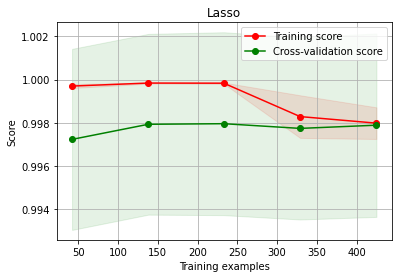

In [53]:
skplt.estimators.plot_learning_curve(lass,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Lasso')

In [54]:
import xgboost as xgb
xg=Lasso(alpha=1.0)
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('xgb',xgb.XGBRegressor())
])

In [55]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [56]:
xgb_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': xgb_pred})

,original test set,predictions
1867,0,4.547092e+02
2202,1704730,1.708544e+06
2104,22161495,2.109624e+07
1769,0,1.853703e+01
1815,0,2.886292e+02
...,...,...
375,5114191,5.110563e+06
63,9376017,9.418854e+06
1024,19604399,1.961541e+07
761,1704730,1.749508e+06


In [57]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_pred)))

r2: 0.9990973410809024


In [58]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

RMSE: 474163.64116580697


In [59]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.99504933 0.99668593 0.9969342  0.97356069 0.9985233  0.98245541
 0.99517132 0.99779706 0.9990271  0.99412012]
Mean of all scores:  0.9929324452268634


<AxesSubplot:title={'center':'XGB'}, xlabel='Training examples', ylabel='Score'>

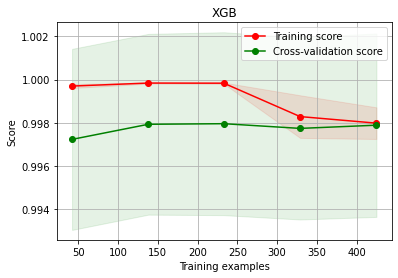

In [60]:
skplt.estimators.plot_learning_curve(xg,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='XGB')

In [61]:
from sklearn.svm import SVR
sv=SVR()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('svr',SVR(kernel='rbf'))
])

In [62]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())])

In [63]:
svr_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': svr_pred})

,original test set,predictions
1867,0,1.704714e+06
2202,1704730,1.704736e+06
2104,22161495,1.704845e+06
1769,0,1.704709e+06
1815,0,1.704719e+06
...,...,...
375,5114191,1.704788e+06
63,9376017,1.704821e+06
1024,19604399,1.704831e+06
761,1704730,1.704767e+06


In [64]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

RMSE: 12802769.530868124


In [65]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [-0.1647312  -0.23429632 -0.25416378 -0.21089595 -0.43142258 -0.17538558
 -0.33836303 -0.18843518 -0.22664111 -0.19589037]
Mean of all scores:  -0.24202251113972414


<AxesSubplot:title={'center':'SVR'}, xlabel='Training examples', ylabel='Score'>

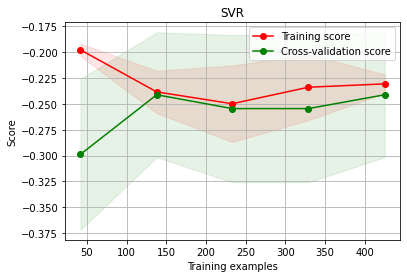

In [66]:
skplt.estimators.plot_learning_curve(sv,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='SVR')

In [104]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('dtr',DecisionTreeRegressor())
])

In [105]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dtr', DecisionTreeRegressor())])

In [106]:
dtr_pred=pipe.predict(X_test)

In [107]:
pd.DataFrame({'original test set':y_test, 'predictions': dtr_pred})

,original test set,predictions
1867,0,0.0
2202,1704730,1704730.0
2104,22161495,23013860.0
1769,0,0.0
1815,0,0.0
...,...,...
375,5114191,5114191.0
63,9376017,9376017.0
1024,19604399,19604399.0
761,1704730,1704730.0


In [108]:
print('r2:', np.sqrt(metrics.r2_score(y_test, dtr_pred)))

r2: 0.9974069589367822


In [109]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

RMSE: 803317.8478250023


In [110]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.99999535 0.99706069 0.99606074 0.97265628 0.99499495 0.98191934
 0.96982128 0.99783906 0.99948585 0.99622814]
Mean of all scores:  0.9906061674397495


<AxesSubplot:title={'center':'Decision Tree'}, xlabel='Training examples', ylabel='Score'>

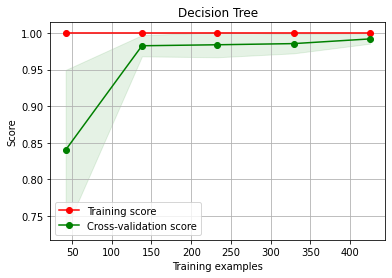

In [111]:
skplt.estimators.plot_learning_curve(dtr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Decision Tree')

In [112]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('rfr',RandomForestRegressor())
])

In [113]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rfr', RandomForestRegressor())])

In [114]:
rfr_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': rfr_pred})

,original test set,predictions
1867,0,0.000000e+00
2202,1704730,1.704730e+06
2104,22161495,2.197397e+07
1769,0,0.000000e+00
1815,0,0.000000e+00
...,...,...
375,5114191,5.114191e+06
63,9376017,9.399883e+06
1024,19604399,1.959673e+07
761,1704730,1.882235e+06


In [115]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_pred)))

r2: 0.997487696926458


In [116]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

RMSE: 790728.7162039244


In [117]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.99992311 0.99838035 0.99782964 0.97296797 0.99826536 0.98115334
 0.99306326 0.99910228 0.99950522 0.99187014]
Mean of all scores:  0.9932060683939505


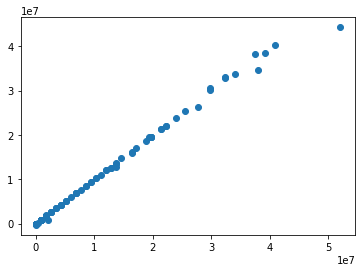

In [118]:
plt.scatter(y_test,rfr_pred)

<AxesSubplot:title={'center':'Random Forest'}, xlabel='Training examples', ylabel='Score'>

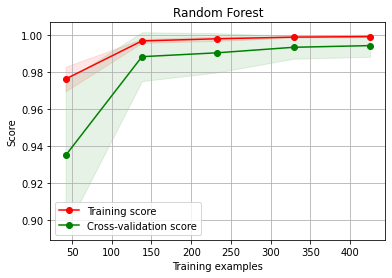

In [119]:
skplt.estimators.plot_learning_curve(rfr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Random Forest')

In [120]:
from sklearn.model_selection import GridSearchCV
param_grid = {  'bootstrap': [True,False], 'max_depth': [5, 10, 15], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],'min_samples_split' : [2, 5, 10, 15, 100],'min_samples_leaf' : [1, 2, 5, 10]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = cv,scoring='neg_mean_squared_error', n_jobs = -1, verbose = 0, return_train_score=True)
search.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [121]:
print(search.best_params_)

{'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 13}


In [122]:
print(search.best_score_)

-437821678900.6454


In [123]:
rfr_search=search.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': rfr_search})

,original test set,predictions
1867,0,-4.097904e+03
2202,1704730,1.694895e+06
2104,22161495,2.196458e+07
1769,0,0.000000e+00
1815,0,0.000000e+00
...,...,...
375,5114191,5.119218e+06
63,9376017,9.362904e+06
1024,19604399,1.958670e+07
761,1704730,1.994394e+06


In [124]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_search)))

r2: 0.9950817855752355


In [125]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_search)))

RMSE: 1105690.354587004


In [126]:
params = {'alpha': [1e-10,1e-6,1e-2,3,5,7,15,100,200,300,500,700]} # It will check from 1e-08 to 1e+08
lasso = Lasso()
cv=KFold(n_splits=10,random_state=1,shuffle=True)
lasso_model = GridSearchCV(lasso, params, cv = cv,scoring='neg_mean_squared_error')
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.922e+13, tolerance: 3.705e+12
  model = cd_fast.enet_coordinate_descent(
c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.862e+13, tolerance: 3.549e+12
  model = cd_fast.enet_coordinate_descent(
c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.683e+13, tolerance: 3.345e+12
  mod

{'alpha': 1e-10}
-165225593621.8922


c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.930e+13, tolerance: 3.883e+12
  model = cd_fast.enet_coordinate_descent(


In [127]:
lass_modelpred=lasso_model.predict(X_test)
result=pd.DataFrame({'original test set':y_test, 'predictions': lass_modelpred})
result

,original test set,predictions
1867,0,3.474864e+03
2202,1704730,1.652281e+06
2104,22161495,2.219659e+07
1769,0,7.215412e+03
1815,0,1.215877e+04
...,...,...
375,5114191,5.129743e+06
63,9376017,9.357139e+06
1024,19604399,1.974820e+07
761,1704730,1.687077e+06


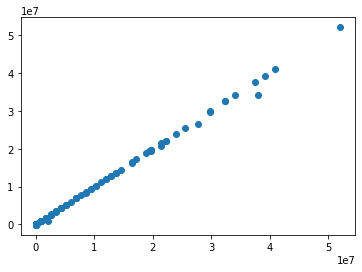

In [128]:
plt.scatter(y_test,lass_modelpred)

In [129]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lass_modelpred)))

r2: 0.9994364048317164


In [130]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lass_modelpred)))

RMSE: 374702.7391446944


In [131]:
lasso_model.best_params_

{'alpha': 1e-10}

In [132]:
lasso_model.best_score_

-165225593621.8922

In [133]:
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = cv,
                        n_jobs = -1,
                        verbose=True,scoring='neg_mean_squared_error')

xgb_grid.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[10:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             scoring='neg_mean_squared_error', verbose=True)

In [134]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

-1313120660882.771
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [135]:
xgb_gridpred=xgb_grid.predict(X_test)

In [136]:
pd.DataFrame({'original test set':y_test, 'predictions': xgb_gridpred})

,original test set,predictions
1867,0,1.998892e+04
2202,1704730,1.788019e+06
2104,22161495,2.135322e+07
1769,0,-8.927793e+03
1815,0,3.774114e+04
...,...,...
375,5114191,4.841133e+06
63,9376017,9.647047e+06
1024,19604399,1.936102e+07
761,1704730,2.407969e+06


In [137]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_gridpred)))

r2: 0.9922201986955259


In [138]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_gridpred)))

RMSE: 1389640.1766992803


Out of all regression machine learning algorithms Lasso Regressor had best r2 score for strategy3 so we consider it as best performed algorithm and stored it in a data frame named "result"

Calculating the mean of the final prediction of sales inorder to obtain the percentage of sales before mid 2015

In [139]:
mean_of_sales_before_mid_2015=result['predictions'].mean()
mean_of_sales_before_mid_2015

7936958.603098979

Calculating the individual percentages for the original and predictions of sales before mid 2015

In [140]:
result['Percenatge_of_sales_before_mid_2015']=(result['predictions']/result['predictions'].sum())*100
result

,original test set,predictions,Percenatge_of_sales_before_mid_2015
1867,0,3.474864e+03,0.000353
2202,1704730,1.652281e+06,0.167884
2104,22161495,2.219659e+07,2.255332
1769,0,7.215412e+03,0.000733
1815,0,1.215877e+04,0.001235
...,...,...,...
375,5114191,5.129743e+06,0.521218
63,9376017,9.357139e+06,0.950752
1024,19604399,1.974820e+07,2.006558
761,1704730,1.687077e+06,0.171419


Calculating the average/mean value of all the final percenatge prediction of sales for Strategy1

In [141]:
Percenatge_of_sales_before_mid_2015=result['Percenatge_of_sales_before_mid_2015'].mean()
Percenatge_of_sales_before_mid_2015

0.8064516129032255

# Prediction of all the Sales in the year 2015 after the competitor drug entrance 

In [142]:
y=after_mid_2015['sales']
y

21      12785478
22      11933113
23      17047304
45      29832781
46      37504068
          ...   
2950    19092980
2951    21309130
2973           0
2974           0
2975      852365
Name: sales, Length: 372, dtype: int64

In [143]:
X=after_mid_2015.copy()
X.drop(['sales'],axis=1,inplace=True)
X.head()

,qty,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5
21,123,0.0,416114.0,0.0,0.0,450000.0,2475000.0,0.0,0.0
22,115,0.0,460359.0,0.0,0.0,225000.0,1575000.0,0.0,0.0
23,164,0.0,287126.0,0.0,0.0,300000.0,1425000.0,0.0,0.0
45,287,252104.0,798300.0,0.0,75000.0,1050000.0,375000.0,150000.0,0.0
46,361,0.0,1081875.0,0.0,0.0,1725000.0,450000.0,0.0,0.0


In [144]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [146]:
X_train.shape

(297, 9)

In [147]:
y_test.shape

(75,)

In [148]:
X_test.shape

(75, 9)

In [149]:
y_train.shape

(297,)

In [150]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [151]:
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lr',LinearRegression())
])

In [152]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [153]:
lr_pred=pipe.predict(X_test)

In [154]:
pd.DataFrame({'original test set':y_test, 'predictions': lr_pred})

,original test set,predictions
1149,1704730,1.675632e+06
1150,852365,8.482621e+05
2206,1704730,1.678234e+06
501,852365,7.879549e+05
2445,426183,1.619653e+06
...,...,...
911,0,1.810278e+04
2518,2557096,2.366186e+06
1990,5966556,5.907616e+06
1607,0,1.265311e+04


In [155]:
from sklearn import metrics
print('r2:', np.sqrt(metrics.r2_score(y_test, lr_pred)))

r2: 0.9990633874174903


In [156]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

RMSE: 484346.13094963075


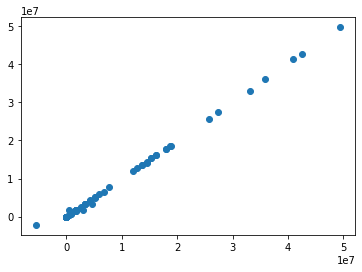

In [157]:
plt.scatter(y_test,lr_pred)

In [158]:
from sklearn.model_selection import cross_val_score,KFold
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.96027888 0.99504628 0.99917683 0.99849752 0.99719158 0.99919883
 0.99913989 0.9984512  0.99879895 0.99924782]
Mean of all scores:  0.9945027779311433


<AxesSubplot:title={'center':'LinearRegression'}, xlabel='Training examples', ylabel='Score'>

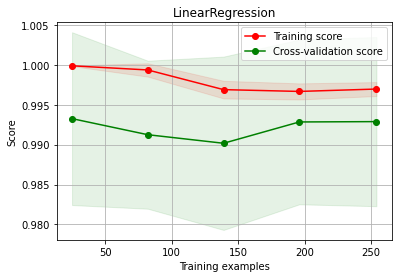

In [159]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='LinearRegression')

In [160]:
from sklearn.linear_model import Lasso
lass=Lasso(alpha=1.0)
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lass',Lasso(alpha=1.0))
])

In [161]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lass', Lasso())])

In [162]:
lasso_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': lasso_pred})

,original test set,predictions
1149,1704730,1.675631e+06
1150,852365,8.482617e+05
2206,1704730,1.678233e+06
501,852365,7.879562e+05
2445,426183,1.619655e+06
...,...,...
911,0,1.810257e+04
2518,2557096,2.366193e+06
1990,5966556,5.907615e+06
1607,0,1.265374e+04


In [163]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lasso_pred)))

r2: 0.9990633923377452


In [164]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

RMSE: 484344.8593496875


In [165]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.96027892 0.99504633 0.99917683 0.99849753 0.99719161 0.99919883
 0.99913989 0.9984512  0.99879895 0.99924782]
Mean of all scores:  0.9945027900272916


<AxesSubplot:title={'center':'Lasso'}, xlabel='Training examples', ylabel='Score'>

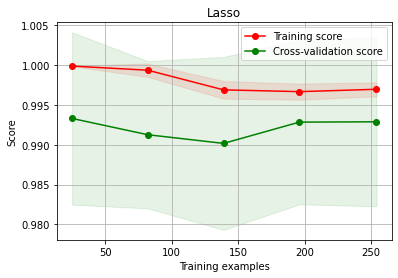

In [166]:
skplt.estimators.plot_learning_curve(lass,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Lasso')

In [167]:
import xgboost as xgb
xg=Lasso(alpha=1.0)
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('xgb',xgb.XGBRegressor())
])

In [168]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [169]:
xgb_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': xgb_pred})

,original test set,predictions
1149,1704730,1.693659e+06
1150,852365,8.529581e+05
2206,1704730,1.704832e+06
501,852365,1.088691e+06
2445,426183,1.703099e+06
...,...,...
911,0,-2.329036e+02
2518,2557096,2.977506e+06
1990,5966556,5.926676e+06
1607,0,-3.545059e+03


In [170]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_pred)))

r2: 0.9990832346784951


In [171]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

RMSE: 479189.2705476037


In [172]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.95865682 0.99491964 0.99702384 0.99667928 0.99847891 0.99783263
 0.99917294 0.99438927 0.99261822 0.99631246]
Mean of all scores:  0.9926084024577063


<AxesSubplot:title={'center':'XGB'}, xlabel='Training examples', ylabel='Score'>

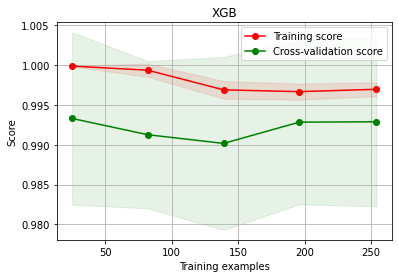

In [173]:
skplt.estimators.plot_learning_curve(xg,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='XGB')

In [174]:
from sklearn.svm import SVR
sv=SVR()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('svr',SVR(kernel='rbf'))
])

In [175]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())])

In [176]:
svr_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': svr_pred})

,original test set,predictions
1149,1704730,3.409438e+06
1150,852365,3.409436e+06
2206,1704730,3.409436e+06
501,852365,3.409446e+06
2445,426183,3.409465e+06
...,...,...
911,0,3.409434e+06
2518,2557096,3.409502e+06
1990,5966556,3.409454e+06
1607,0,3.409437e+06


In [177]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

RMSE: 11908346.286465285


In [178]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [-0.32560566 -0.17935233 -0.08065232 -0.25020154 -0.28717712 -0.25917592
 -0.12166288 -0.11069919 -0.12067052 -0.38349199]
Mean of all scores:  -0.21186894695578617


<AxesSubplot:title={'center':'SVR'}, xlabel='Training examples', ylabel='Score'>

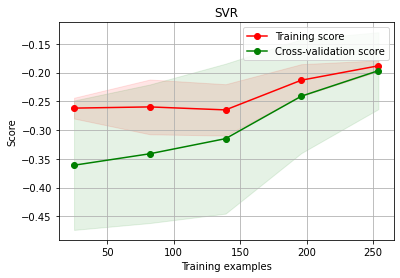

In [179]:
skplt.estimators.plot_learning_curve(sv,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='SVR')

In [180]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('dtr',DecisionTreeRegressor())
])

In [181]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dtr', DecisionTreeRegressor())])

In [182]:
dtr_pred=pipe.predict(X_test)

In [183]:
pd.DataFrame({'original test set':y_test, 'predictions': dtr_pred})

,original test set,predictions
1149,1704730,1704730.0
1150,852365,852365.0
2206,1704730,1704730.0
501,852365,852365.0
2445,426183,1704730.0
...,...,...
911,0,0.0
2518,2557096,2557096.0
1990,5966556,5966556.0
1607,0,0.0


In [184]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

RMSE: 806900.6535357538


In [185]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.95338477 0.99739184 0.99859782 0.9943058  0.99149054 0.99454334
 0.9991612  0.98849468 0.9874989  0.99203428]
Mean of all scores:  0.9896903156672506


<AxesSubplot:title={'center':'Decision Tree'}, xlabel='Training examples', ylabel='Score'>

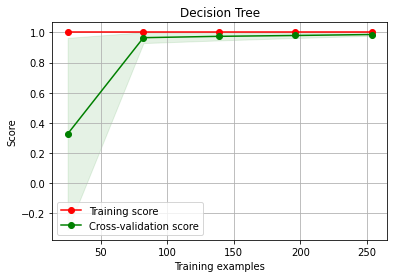

In [186]:
skplt.estimators.plot_learning_curve(dtr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Decision Tree')

In [187]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('rfr',RandomForestRegressor())
])

In [188]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rfr', RandomForestRegressor())])

In [189]:
rfr_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': rfr_pred})

,original test set,predictions
1149,1704730,1704730.00
1150,852365,852365.00
2206,1704730,1704730.00
501,852365,852365.00
2445,426183,1704730.00
...,...,...
911,0,0.00
2518,2557096,2665346.29
1990,5966556,5834439.39
1607,0,0.00


In [190]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_pred)))

r2: 0.9988383405666285


In [191]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

RMSE: 539374.9908897026


In [192]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.95779001 0.99719412 0.99823376 0.99224428 0.99743272 0.99834647
 0.98144359 0.99634978 0.99341281 0.99796825]
Mean of all scores:  0.9910415778252485


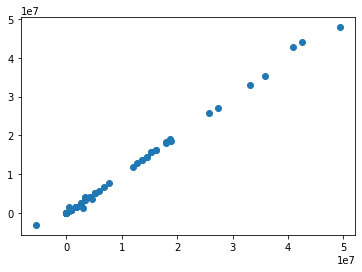

In [193]:
plt.scatter(y_test,rfr_pred)

<AxesSubplot:title={'center':'Random Forest'}, xlabel='Training examples', ylabel='Score'>

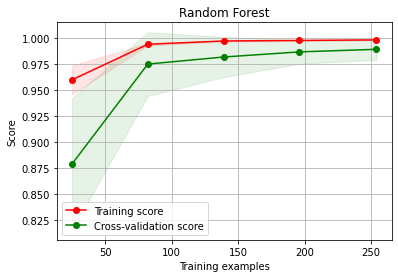

In [194]:
skplt.estimators.plot_learning_curve(rfr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Random Forest')

In [195]:
from sklearn.model_selection import GridSearchCV
param_grid = {  'bootstrap': [True,False], 'max_depth': [5, 10, 15], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],'min_samples_split' : [2, 5, 10, 15, 100],'min_samples_leaf' : [1, 2, 5, 10]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = cv,scoring='neg_mean_squared_error', n_jobs = -1, verbose = 0, return_train_score=True)
search.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [196]:
print(search.best_params_)

{'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 6}


In [197]:
print(search.best_score_)

-729431144432.0874


In [198]:
rfr_search=search.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': rfr_search})

,original test set,predictions
1149,1704730,1.704730e+06
1150,852365,8.523650e+05
2206,1704730,1.704730e+06
501,852365,8.523650e+05
2445,426183,1.704730e+06
...,...,...
911,0,0.000000e+00
2518,2557096,2.954866e+06
1990,5966556,5.966556e+06
1607,0,0.000000e+00


In [199]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_search)))

r2: 0.9988440898434919


In [200]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_search)))

RMSE: 538039.3736122424


In [201]:
params = {'alpha': [1e-10,1e-6,1e-2,3,5,7,15,100,200,300,500,700]} # It will check from 1e-08 to 1e+08
lasso = Lasso()
cv=KFold(n_splits=10,random_state=1,shuffle=True)
lasso_model = GridSearchCV(lasso, params, cv = cv,scoring='neg_mean_squared_error')
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.377e+13, tolerance: 2.870e+12
  model = cd_fast.enet_coordinate_descent(
c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.339e+13, tolerance: 2.850e+12
  model = cd_fast.enet_coordinate_descent(
c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.754e+13, tolerance: 2.867e+12
  mod

{'alpha': 700}
-428569982820.2186


In [214]:
lass_modelpred=lasso_model.predict(X_test)
result=pd.DataFrame({'original test set':y_test, 'predictions': lass_modelpred})
result

,original test set,predictions
1149,1704730,1.675634e+06
1150,852365,8.482647e+05
2206,1704730,1.678235e+06
501,852365,7.879608e+05
2445,426183,1.619661e+06
...,...,...
911,0,1.810632e+04
2518,2557096,2.366205e+06
1990,5966556,5.907613e+06
1607,0,1.265930e+04


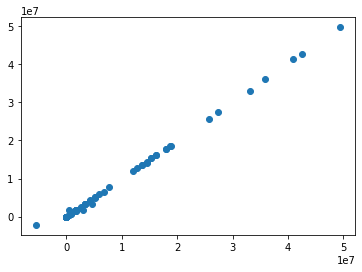

In [203]:
plt.scatter(y_test,lass_modelpred)

In [204]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lass_modelpred)))

r2: 0.9990633920954479


In [205]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lass_modelpred)))

RMSE: 484344.92196953215


In [206]:
lasso_model.best_params_

{'alpha': 700}

In [207]:
lasso_model.best_score_

-428569982820.2186

In [208]:
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = cv,
                        n_jobs = -1,
                        verbose=True,scoring='neg_mean_squared_error')

xgb_grid.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[10:39:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             scoring='neg_mean_squared_error', verbose=True)

In [209]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

-2583043711770.3267
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [210]:
xgb_gridpred=xgb_grid.predict(X_test)

In [211]:
pd.DataFrame({'original test set':y_test, 'predictions': xgb_gridpred})

,original test set,predictions
1149,1704730,1.553029e+06
1150,852365,8.171331e+05
2206,1704730,1.657460e+06
501,852365,9.452586e+05
2445,426183,1.544594e+06
...,...,...
911,0,-2.990636e+04
2518,2557096,4.534571e+06
1990,5966556,6.640830e+06
1607,0,8.877670e+05


In [212]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_gridpred)))

r2: 0.9928056677950218


In [213]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_gridpred)))

RMSE: 1340263.7677072033


Out of all regression machine learning algorithms Lasso Regressor had best r2 score for strategy3 so we consider it as best performed algorithm and stored it in a data frame named "result"

Calculating the mean of the final prediction of sales inorder to obtain the percentage of sales

In [215]:
mean_of_sales_after_mid_2015=result['predictions'].mean()
mean_of_sales_after_mid_2015

7473105.851324702

Calculating the individual percentages for the original and predictions of sales after mid 2015

In [216]:
result['Percenatge_of_sales_after_mid_2015']=(result['predictions']/result['predictions'].sum())*100
result

,original test set,predictions,Percenatge_of_sales_after_mid_2015
1149,1704730,1.675634e+06,0.298963
1150,852365,8.482647e+05,0.151345
2206,1704730,1.678235e+06,0.299427
501,852365,7.879608e+05,0.140586
2445,426183,1.619661e+06,0.288976
...,...,...,...
911,0,1.810632e+04,0.003230
2518,2557096,2.366205e+06,0.422172
1990,5966556,5.907613e+06,1.054022
1607,0,1.265930e+04,0.002259


Calculating the average/mean value of all the final percenatge prediction of sales for Strategy1

In [217]:
Percenatge_of_sales_after_mid_2015=result['Percenatge_of_sales_after_mid_2015'].mean()
Percenatge_of_sales_after_mid_2015

1.333333333333333

Calculating the mean of the final prediction of sales inorder to obtain the percentage of sales after mid 2015.

In [220]:
mean_of_sales_after_mid_2015

7473105.851324702

In [221]:
mean_of_sales_before_mid_2015

7936958.603098979

The extent of loss of potential sales due to a new competitor drug entrance in mid 2015

In [218]:
Percenatge_of_sales_before_mid_2015

0.8064516129032255

In [219]:
Percenatge_of_sales_after_mid_2015

1.333333333333333

Clearly the percentage of Sales of new drug is more than 52% more than NZT-48 after mid 2015. So there is a huge impact of sales on NZT-48 due to new competitor drug in market in 2015.